In [3]:
from __future__ import division, print_function

%matplotlib inline

In [27]:
path = "W://vincent-data/datasets/dogscats/sample/" #run on a very small subset to check script

In [4]:
import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

#### check your ~/.keras/keras.json!

this lesson SHOULD run over Theanos instead of TensorFlow:
check that ~/.keras/keras.json is set for Theano and includes "image_data_format": "channels_first"

~/.keras/keras.json 

    {
        "image_dim_ordering": "th",
        "image_data_format": "channels_first",
        "epsilon": 1e-07,
        "floatx": "float32",
        "backend": "theano"
    }
    
   
#### check your ~/.theanorc

    [global]
    floatX = float32
    device=cuda
    optimizer=fast_run
    
    [dnn]
    include_path=C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v9.0\include
    library_path=C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v9.0\lib\x64
    
    [nvcc]
    flags=-LC:\Users\Vince\Anaconda3\Lib
    compiler_bindir=C:\Program Files (x86)\Microsoft Visual Studio 14.0\VC\bin

In [12]:
from importlib import reload  # Python 3
import utils; reload(utils)
from utils import plots

In [7]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
#batch_size = 1
batch_size = 4 #for plotting
#batch_size = 64

In [8]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [9]:
#create vgg16 object
vgg = Vgg16()

In [15]:
# use pretrained vgg16 model
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [16]:
imgs,labels = next(batches)

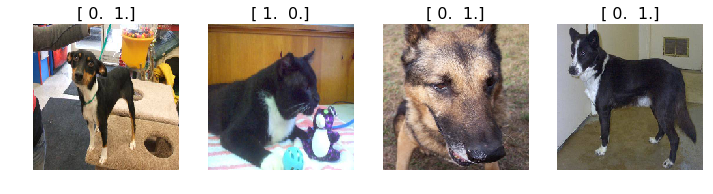

In [17]:
plots(imgs, titles=labels)

In [19]:
#show default vgg16 classes
vgg.classes[:10]

['tench',
 'goldfish',
 'great_white_shark',
 'tiger_shark',
 'hammerhead',
 'electric_ray',
 'stingray',
 'cock',
 'hen',
 'ostrich']

In [20]:
#specialize model
batch_size = 64
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [21]:
#modify model
vgg.finetune(batches)

In [22]:
#vgg.fit = Trains the model for a fixed number of epochs (iterations on a dataset).
vgg.fit(batches, val_batches, batch_size, nb_epoch=1)

Epoch 1/1
3/3 [==============================] - 48s - loss: 1.3112 - acc: 0.5820 - val_loss: 0.1815 - val_acc: 0.9500


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


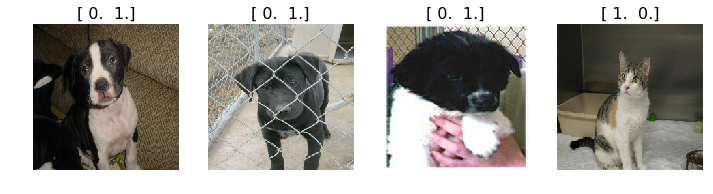

In [23]:
#show results
batch_size = 4
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
imgs,labels = next(batches)
plots(imgs, titles=labels)

In [24]:
#vgg.predict = Generates output predictions for the input samples.
vgg.predict(imgs, True)

(array([ 0.9465,  0.9997,  0.979 ,  0.9495], dtype=float32),
 array([1, 1, 1, 0], dtype=int64),
 ['dogs', 'dogs', 'dogs', 'cats'])

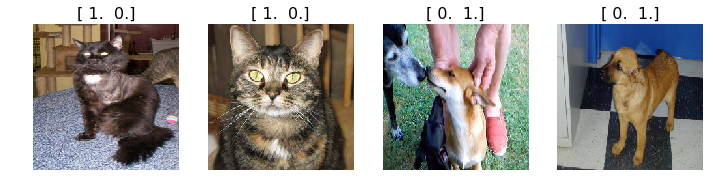

In [25]:
imgs,labels = next(batches)
plots(imgs, titles=labels)

In [26]:
vgg.predict(imgs, True)

(array([ 0.9786,  0.9856,  0.9991,  0.8004], dtype=float32),
 array([0, 0, 1, 1], dtype=int64),
 ['cats', 'cats', 'dogs', 'dogs'])

#### now running on entire dataset

In [7]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16
vgg = Vgg16()
batch_size = 128
path = "W://vincent-data/datasets/dogscats/" #run on entire dataset

In [8]:
print('training dataset')
batches = vgg.get_batches(path+'train', batch_size=batch_size)

print('validation dataset')
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)

training dataset
Found 23000 images belonging to 2 classes.
validation dataset
Found 2000 images belonging to 2 classes.


In [9]:
vgg.finetune(batches)
vgg.fit(batches, val_batches, batch_size, nb_epoch=1)

Epoch 1/1
180/180 [==============================] - 6754s - loss: 0.1284 - acc: 0.9639 - val_loss: 0.0472 - val_acc: 0.9840


Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


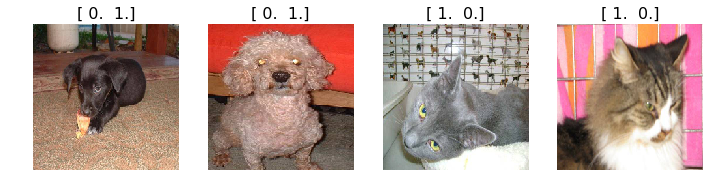

In [10]:
batch_size = 4
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
imgs,labels = next(batches)
plots(imgs, titles=labels)

In [11]:
vgg.predict(imgs, True)

(array([ 0.9999,  1.    ,  1.    ,  1.    ], dtype=float32),
 array([1, 1, 0, 0], dtype=int64),
 ['dogs', 'dogs', 'cats', 'cats'])